In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
!unzip '/content/drive/My Drive/Colab Notebooks/datasets.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/datasets.zip
  inflating: datasets/.DS_Store      
 extracting: datasets/cifar-10-python.tar.gz  
   creating: datasets/cifar10/
   creating: datasets/cifar10/train/
   creating: datasets/cifar10/train/cifar-10-batches-py/
  inflating: datasets/cifar10/train/cifar-10-batches-py/batches.meta  
  inflating: datasets/cifar10/train/cifar-10-batches-py/data_batch_1  
  inflating: datasets/cifar10/train/cifar-10-batches-py/data_batch_2  
  inflating: datasets/cifar10/train/cifar-10-batches-py/data_batch_3  
  inflating: datasets/cifar10/train/cifar-10-batches-py/data_batch_4  
  inflating: datasets/cifar10/train/cifar-10-batches-py/data_batch_5  
 extracting: datasets/cifar10/train/cifar-10-batches-py/readme.html  
  inflating: datasets/cifar10/train/cifar-10-batches-py/test_batch  
 extracting: datasets/cifar10/train/cifar-10-python.tar.gz  
  inflating: datasets/cifar10/train/_DS_Store  
  inflating: datasets/cifar10/_DS_Store  
   creating

In [0]:
!unzip '/content/datasets/cifar-10-python.tar.gz'

Archive:  /content/datasets/cifar-10-python.tar.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/datasets/cifar-10-python.tar.gz or
        /content/datasets/cifar-10-python.tar.gz.zip, and cannot find /content/datasets/cifar-10-python.tar.gz.ZIP, period.


In [0]:
import zipfile
zip = zipfile.ZipFile('/content/drive/My Drive/Colab Notebooks/datasets.zip')
zip.extractall('datasets')

In [0]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!tar xf '/content/datasets/cifar-10-python.tar.gz' -C '/content/datasets'


gzip: stdin: unexpected end of file
tar: Unexpected EOF in archive
tar: Unexpected EOF in archive
tar: Error is not recoverable: exiting now


In [0]:
with open(r"C:\Users\USER\Documents\Image Classification with Pytorch\datasets\cifar10\train\cifar-10-batches-py\data_batch_1", 'rb') as input_file: 
    X = pickle.load(input_file, encoding='latin1')

In [0]:
X.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [0]:
X = X['data']

In [0]:
X.shape

(10000, 3072)

In [0]:
X = X.reshape(-1, 3, 32, 32)

X.shape

(10000, 3, 32, 32)

In [0]:
X = X.transpose(0, 2, 3, 1)

X.shape

(10000, 32, 32, 3)

In [0]:
X = X.reshape(-1, 3 * 32 * 32)

X.shape

(10000, 3072)

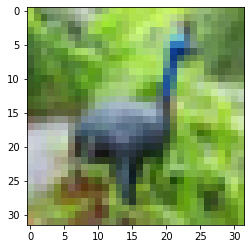

In [0]:
plt.imshow(X[6].reshape(32, 32, 3))

plt.show()

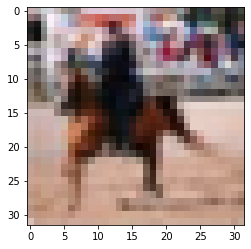

In [0]:
plt.imshow(X[133].reshape(32, 32, 3))

plt.show()

In [0]:
X = X - X.mean(axis = 0)



In [0]:
X = X / np.std(X, axis = 0)

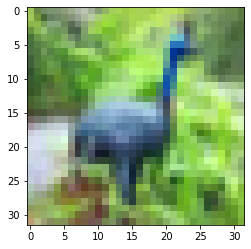

In [0]:
def show(i):
    
    i = i.reshape(32, 32, 3)
    
    m, M = i.min(), i.max()
    
    plt.imshow((i - m) / (M - m))
    
    plt.show()
    
show(X[6])

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor()
])

In [0]:
dataset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train', download=True, transform=transform)

Files already downloaded and verified


In [0]:
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./datasets/cifar10/train
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

In [0]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True,
                                         num_workers = 2)

In [0]:
images_batch, label_batch = iter(dataloader).next()

In [0]:
images_batch.shape

torch.Size([16, 3, 256, 256])

In [0]:
images_batch.shape

torch.Size([16, 3, 256, 256])

In [0]:
import numpy as np
img = torchvision.utils.make_grid(images_batch)

In [0]:
img = np.transpose(img, (1, 2, 0))

In [0]:
img.shape

torch.Size([518, 2066, 3])

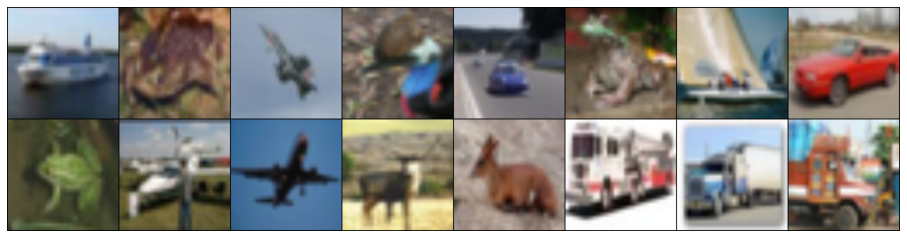

In [0]:
plt.figure(figsize = (16, 12))

plt.imshow(img)
plt.axis('off')
plt.show()

**Normalization** of **images**

In [0]:
pop_mean = []
pop_std = []

In [0]:
for i, data in enumerate(dataloader, 0):

  numpy_imgage = data[0].numpy()

  batch_mean = np.mean(numpy_imgage, axis= (0,2, 3))
  batch_std = np.std(numpy_imgage, axis = (0, 2, 3))

  pop_mean.append(batch_mean)
  pop_std.append(batch_std)

In [0]:
pop_mean = np.array(pop_mean)
pop_std = np.array(pop_std)

In [0]:
pop_mean.shape, pop_std.shape

((3125, 3), (3125, 3))

In [0]:
pop_mean = pop_mean.mean(axis = 0)
pop_std = pop_std.mean(axis = 0)

In [0]:
print(pop_mean)
print(pop_std)

[0.49159083 0.4823461  0.44671956]
[0.23837179 0.23493737 0.25270498]


In [0]:
transform = transforms.Compose([#transforms.Resize(256),
                                transforms.RandomSizedCrop(224),
                                transforms.ColorJitter(),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize(pop_mean,
                                                    pop_std)
                                ])

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:704: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  "please use transforms.RandomResizedCrop instead.")


In [0]:
trainset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train', download=True, transform=transform,
                                        train = True)

Files already downloaded and verified


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)

In [0]:
images_batch, label_batch = iter(trainloader).next()

In [0]:
img = torchvision.utils.make_grid(images_batch)

In [0]:
images_batch.shape

torch.Size([16, 3, 224, 224])

In [0]:
img = np.transpose(img, (1, 2, 0))

img.shape

torch.Size([454, 1810, 3])

In [0]:
m, M = img.min(), img.max()

m, M

(tensor(-2.0623), tensor(2.2034))

In [0]:
img = (1/(abs(m) * M)) * img + 0.5

In [0]:
img

tensor([[[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.3177, 0.2980, 0.1588],
         ...,
         [0.1548, 0.1547, 0.2271],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        ...,

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.4987, 0.5404, 0.5754],
         ...,
         [0.5603, 0.5220, 0.5174],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.

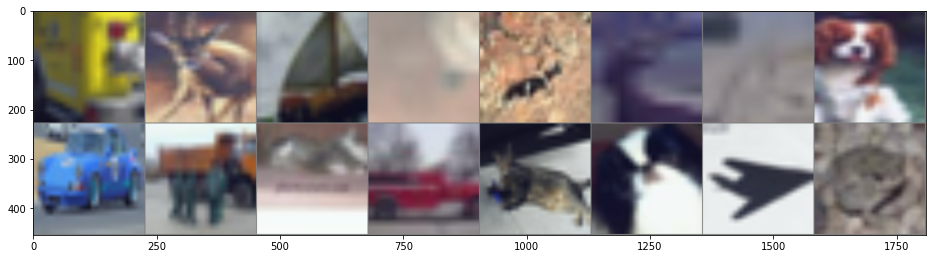

In [0]:
plt.figure(figsize = (16, 12))

plt.imshow(img)
plt.show()